plot cwnd vs time

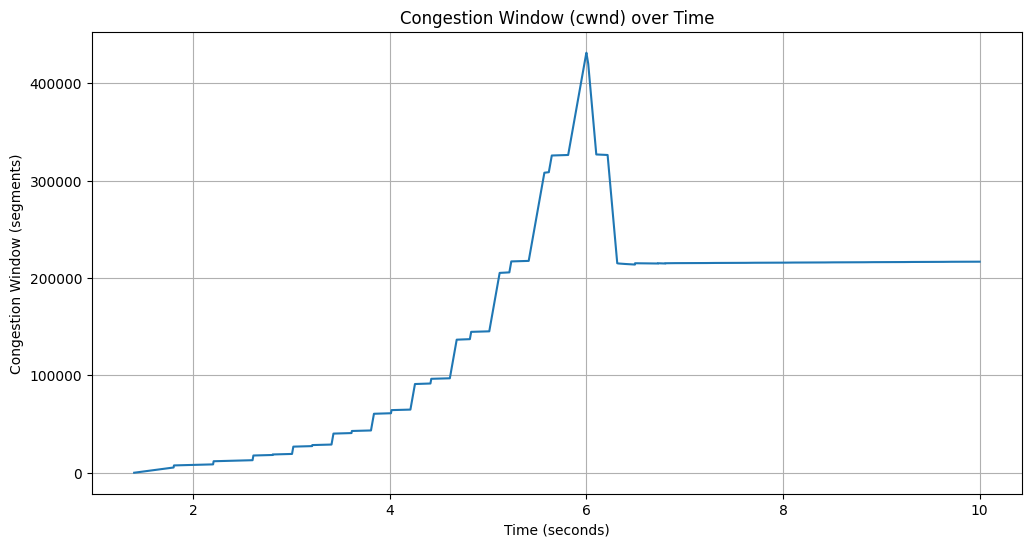

In [9]:
import matplotlib.pyplot as plt

time = []
cwnd = []

#given code for gnuplot
# set term postscript eps color
# set output 'cwnd.eps'
# set ylabel 'cwnd'
# set xlabel 'time'
# plot 'tcp-example.cwnd' using 1:2

with open('ns-3.42/tcp-example.cwnd') as f:
    for line in f:
        columns = line.split()
        time.append(float(columns[0]))
        cwnd.append(float(columns[1]))

plt.figure(figsize=(12, 6))
plt.plot(time, cwnd, label='Congestion Window')
plt.xlabel('Time (seconds)')
plt.ylabel('Congestion Window (segments)')
plt.title('Congestion Window (cwnd) over Time')
plt.grid(True)
plt.show()

plot queuing delays


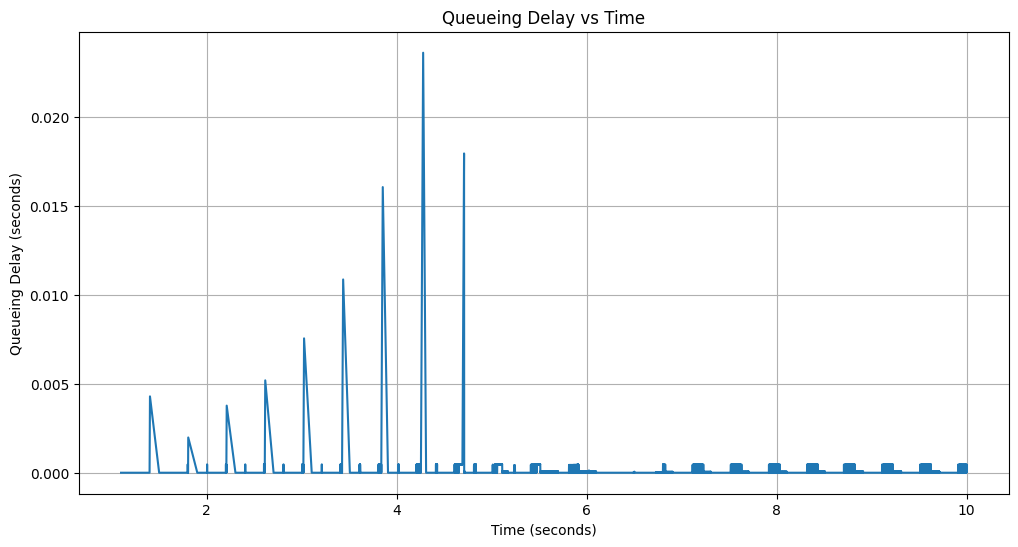

In [10]:
import re
import matplotlib.pyplot as plt

#regular expressions to extract relevant details from trace entries
enqueue_pattern = r'\+ (\d+\.\d+) /NodeList/\d+/DeviceList/\d+/(\S+)/Enqueue'
dequeue_pattern = r'- (\d+\.\d+) /NodeList/\d+/DeviceList/\d+/(\S+)/Dequeue'

enqueue_times = []
dequeue_times = []
pkt_ids = {}

with open('ns-3.42/tcp-example.tr', 'r') as tracefile:
    for line in tracefile:
        #match enqueue event
        enqueue_match = re.search(enqueue_pattern, line)
        if enqueue_match:
            timestamp = float(enqueue_match.group(1))
            pkt_id = enqueue_match.group(2)
            pkt_ids[pkt_id] = timestamp #store the enqueue timestamp

        #match dequeue event
        dequeue_match = re.search(dequeue_pattern, line)
        if dequeue_match:
            timestamp = float(dequeue_match.group(1))
            pkt_id = dequeue_match.group(2)
            if pkt_id in pkt_ids:
                enqueue_time = pkt_ids[pkt_id] #get the matching enqueue time
                queueing_delay = timestamp - enqueue_time #calculate queueing delay
                enqueue_times.append(queueing_delay) #store the dequeue time
                dequeue_times.append(timestamp) #store the queueing delay

plt.figure(figsize=(12, 6))
plt.plot(dequeue_times, enqueue_times)
plt.xlabel('Time (seconds)')
plt.ylabel('Queueing Delay (seconds)')
plt.title('Queueing Delay vs Time')
plt.grid(True)
plt.show()